## Importing Libraries

In [130]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [131]:
## customizing all the display requirements
plt.style.use('fivethirtyeight')
# pd.set_option('max_columns',500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Fred API Setup

In [132]:
## FredAPI importing
# using pip install fredapi to get the data
from fredapi import Fred

In [133]:

fred_key = '###################'

## Create fred object to pull the data
fred = Fred(api_key = fred_key)

## Data Searching, Filtering, Quering and Extraction

### Extracting S&P data from Fred

In [134]:
## Search for economic data for S&P based on popuarity

sp_data = fred.search("S&P",order_by='popularity')
sp_data.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-07-16   2024-07-16   
CSUSHPINSA          CSUSHPINSA     2024-07-16   2024-07-16   
SP500                    SP500     2024-07-16   2024-07-16   
MEHOINUSA672N    MEHOINUSA672N     2024-07-16   2024-07-16   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-07-16   2024-07-16   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-07-12  Daily, Close   
CSUSHPINSA            1987-01-01      2024-04-01       Monthly   
SP500                 2014-07-16      2024-07-15  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-07-12  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-07-15 08:57:09-05:00   
CSUSHPINSA                           NSA  2024-06-25 08:12:01-05:00   
SP500                                NSA  2024-07-15 19:20:57-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-07-15 08:57:10-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

In [135]:
## Pull Raw data
# getting all the SP type data from the objects

sp500_data = fred.get_series(series_id='SP500')
sp500_data.head(4)

2014-07-16    1981.57
2014-07-17    1958.12
2014-07-18    1978.22
2014-07-21    1973.63
dtype: float64

<AxesSubplot:title={'center':'S&P 500'}>

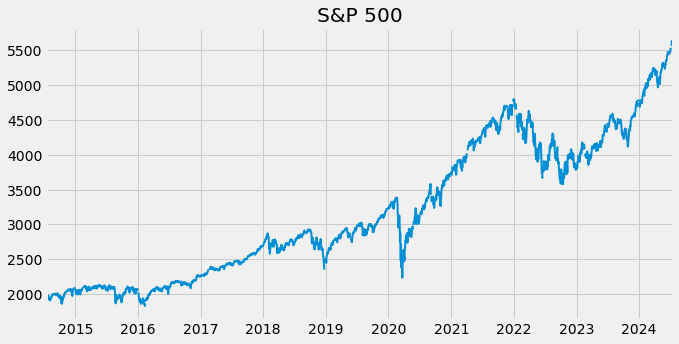

In [136]:
## Line graph for economical data

sp500_data.plot(figsize=(10,5),title='S&P 500',lw=2)

# figsize - dimensions of the graph, title - giving title, lw - thickness of the line

### Extracting Unemployment data from Fred

In [137]:
## Pull and join multiple data series

# data for unemployment
unemployment = fred.search('unemployment')
# unemployment

# Getting Seasonally Adjusted unemployment data
## dataset number 1
unrate = fred.get_series('UNRATE')
unrate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<AxesSubplot:>

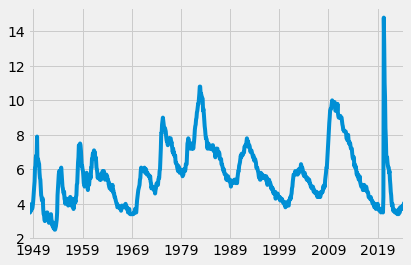

In [138]:
unrate.plot()

In [139]:
## getting data specific to unemployment rate statewise then filtering on frequency and monthly data
## after filtering querying on data which is seasonally adjusted and units are in percentage

unemploy_state_df = fred.search('unemployment rate state',filter=('frequency','Monthly')).query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
unemploy_state_df.shape

(161, 15)

In [140]:
## filtering the data even more based if the dataset title contains Unemployment rate in it or not

unemploy_state_df = unemploy_state_df[unemploy_state_df['title'].str.contains('Unemployment Rate')]
unemploy_state_df.shape

(99, 15)

In [141]:
unemploy_state_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [142]:
# this is the meta data for the actual data
unemploy_state_df.head(5)

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-07-16   2024-07-16   
LNS14000006            LNS14000006     2024-07-16   2024-07-16   
CAUR                          CAUR     2024-07-16   2024-07-16   
TXUR                          TXUR     2024-07-16   2024-07-16   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-07-16   2024-07-16   

                                                          title  \
series id                                                         
UNRATE                                        Unemployment Rate   
LNS14000006       Unemployment Rate - Black or African American   
CAUR                            Unemployment Rate in California   
TXUR                                 Unemployment Rate in Texas   
M0892AUSM156SNBR            Unemployment Rate for United States   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-06-01   Monthly               M   
LNS14000006             1972-01-01      2024-06-01   Monthly               M   
CAUR                    1976-01-01      2024-05-01   Monthly               M   
TXUR                    1976-01-01      2024-05-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-07-05 07:52:02-05:00   
LNS14000006                             SA  2024-07-05 07:52:03-05:00   
CAUR                                    SA  2024-06-26 12:20:02-05:00   
TXUR                                    SA  2024-06-26 12:20:03-05:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   

                 popularity                                              notes  
series id                                                                       
UNRATE                   95  The unemployment rate represents the number of...  
LNS14000006              72  The series comes from the 'Current Population ...  
CAUR                     64                                               None  
TXUR                     56                                               None  
M0892AUSM156SNBR         54  Series Is Presented Here As Three Variables--(...

In [143]:
# Getting all the data in a single data frame by looping over the filtered and queried dataframes

all_results = []

for id in unemploy_state_df.index:
    result = fred.get_series(id)
    result = result.to_frame(name=id)
    all_results.append(result)

## This stored data in list fromat with each list item as a series type for each state

In [144]:
## concatinating all the data frame frame from list into a pandas dataframe
# along each month there are %age values of unemployment for each state of US
# date starte from "1929-04-01"	to "2024-06-01"

unemploy_df = pd.concat(all_results,axis=1)

#### Data Cleaning and Visualization

In [145]:
## Data Cleaning
# Since there are about 50 states but we can see 99 columns forming we will clean the data first

unemploy_df.columns

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [146]:
not_reqd_col = ['UNRATE','U2RATE','LNS14000006','LNS14027659','M0892AUSM156SNBR','LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR','LNS14000002', 
                 'LNS14000009', 'LNS14000003','LNS14000001', 'LNS14027660', 'LNS14027662','LNS14024887','LRUN64TTUSM156S', 
                 'LNS14032183', 'LNS14000012', 'LNS14032183', 'LNS14000012','LASMT261982000000003','LNS14000060', 'LNS14000028',
                 'LASMT391746000000003','LNS14000018','LNS14000036','LNS14000032','LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
                 'LNS14100000', 'LNS14000315', 'LNS14000029', 'LRHUTTTTUSM156S',
                 'LNS14024230', 'LNS14000025', 'LNS14000061','LRUNTTTTUSM156S', 'LNS14000026', 'LNS14000048',
                 'LNS14000089', 'M08311USM156SNBR', 'LNS14000150', 'LRUN25TTUSM156S']
print(unemploy_df.shape)
unemploy_df = unemploy_df.drop(not_reqd_col,axis = 1)
print(unemploy_df.shape)

(1131, 99)
(1131, 57)


<AxesSubplot:>

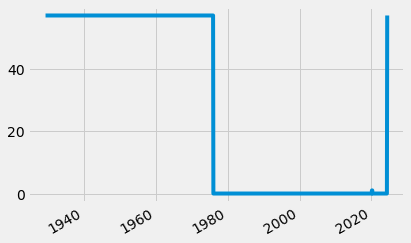

In [147]:
# Plot of nan value present on each month
unemploy_df.isna().sum(axis=1).plot()

In [148]:
# droping all the nan valued rows as no data is present for these montly and we will do the analysis for the provided data only
print(unemploy_df.shape)
unemploy_df = unemploy_df.dropna()
print(unemploy_df.shape)

(1131, 57)
(579, 57)


In [149]:
# ploting plotly interactive line graph for each state 
px.line(unemploy_df)

# Result - We can see that there is a sudden spike in may 2020 period beacuse of covid


<AxesSubplot:title={'center':'Unemployment rate by states for 2020-05-01'}>

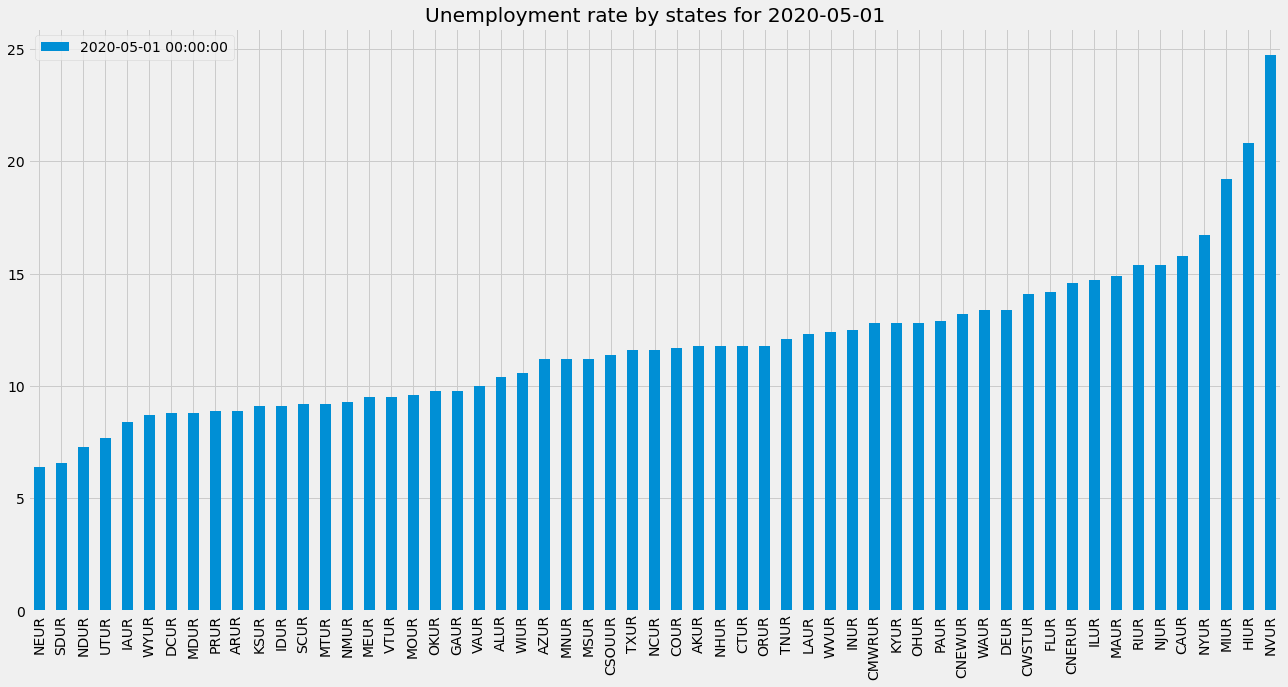

In [150]:
# Lets look for the spike data for each state closely
## Pulling May 2020 Unemployment rate per state

unemploy_df.loc[unemploy_df.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='bar',figsize=(20,10),title='Unemployment rate by states for 2020-05-01')

In [151]:
# to get all the state names along the chart we are now extacting state names from the meta data that we have
# title have states name written in them with a subscipt of "Unemployment Rate in"
unemploy_state_df.head()

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-07-16   2024-07-16   
LNS14000006            LNS14000006     2024-07-16   2024-07-16   
CAUR                          CAUR     2024-07-16   2024-07-16   
TXUR                          TXUR     2024-07-16   2024-07-16   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-07-16   2024-07-16   

                                                          title  \
series id                                                         
UNRATE                                        Unemployment Rate   
LNS14000006       Unemployment Rate - Black or African American   
CAUR                            Unemployment Rate in California   
TXUR                                 Unemployment Rate in Texas   
M0892AUSM156SNBR            Unemployment Rate for United States   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-06-01   Monthly               M   
LNS14000006             1972-01-01      2024-06-01   Monthly               M   
CAUR                    1976-01-01      2024-05-01   Monthly               M   
TXUR                    1976-01-01      2024-05-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-07-05 07:52:02-05:00   
LNS14000006                             SA  2024-07-05 07:52:03-05:00   
CAUR                                    SA  2024-06-26 12:20:02-05:00   
TXUR                                    SA  2024-06-26 12:20:03-05:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   

                 popularity                                              notes  
series id                                                                       
UNRATE                   95  The unemployment rate represents the number of...  
LNS14000006              72  The series comes from the 'Current Population ...  
CAUR                     64                                               None  
TXUR                     56                                               None  
M0892AUSM156SNBR         54  Series Is Presented Here As Three Variables--(...

In [152]:
# extracting all the state names and converting it to a dict to use it for mapping

id_to_state = unemploy_state_df['title'].str.replace('Unemployment Rate in ','').to_dict()

In [153]:
unemploy_df.columns

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR', 'CTUR', 'IDUR',
       'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR',
       'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'],
      dtype='object')

In [154]:
# replacing coded column names with full state names 
unemploy_df.columns = [id_to_state[c] for c in unemploy_df.columns]

In [155]:
unemploy_df.head()

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Kansas  \
1976-01-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-02-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-03-01       9.9      6.6           10.5             6.4  ...     4.2   
1976-04-01       9.8      6.5           10.3             6.3  ...     4.2   
1976-05-01       9.6      6.4           10.1             6.1  ...     4.2   

            Wyoming  Delaware  Vermont  South Dakota  Midwest Census Region  \
1976-01-01      4.1       8.0      8.6           3.3                    6.8   
1976-02-01      4.1       8.0      8.6           3.3                    6.8   
1976-03-01      4.1       8.0      8.6           3.2                    6.8   
1976-04-01      4.0       8.1      8.6           3.1                    6.7   
1976-05-01      3.9       8.3      8.5           3.1                    6.6   

            South Census Region  Northeast Census Region  West Census Region  \
1976-01-01                  6.9                      9.6                 8.6   
1976-02-01                  6.9                      9.6                 8.6   
1976-03-01                  6.9                      9.6                 8.6   
1976-04-01                  6.8                      9.5                 8.5   
1976-05-01                  6.7                      9.5                 8.5   

            New England Census Division  
1976-01-01                          9.6  
1976-02-01                          9.6  
1976-03-01                          9.6  
1976-04-01                          9.4  
1976-05-01                          9.3  

[5 rows x 57 columns]

<AxesSubplot:title={'center':'Unemployment rate by states for 2020-05-01'}>

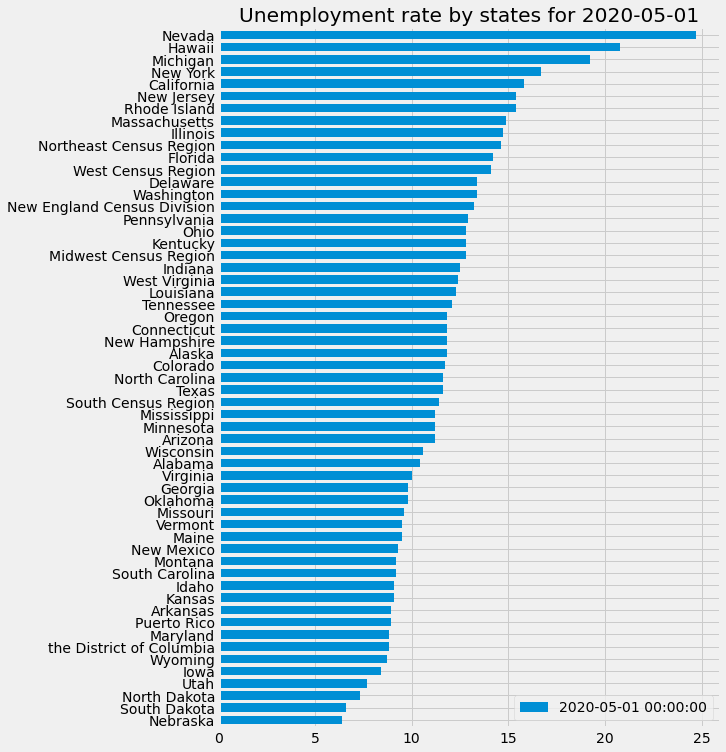

In [158]:

unemploy_df.loc[unemploy_df.index == '2020-05-01'].T\
    .sort_values('2020-05-01')\
    .plot(kind='barh',figsize=(8,12), width = 0.7,title='Unemployment rate by states for 2020-05-01')

### Extracting Participation rate

In [162]:
# searching for participation rate and filtering on frequenct and montly data
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
print(part_df.shape)
# querying all the seasnally adjusted and percentage data
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units	== "Percent"')
print(part_df.shape)

(308, 15)
(109, 15)


In [163]:
part_df.head()

id realtime_start realtime_end  \
series id                                              
CIVPART          CIVPART     2024-07-16   2024-07-16   
LNS11300060  LNS11300060     2024-07-16   2024-07-16   
LNS11300002  LNS11300002     2024-07-16   2024-07-16   
LNS11300001  LNS11300001     2024-07-16   2024-07-16   
LNS11324230  LNS11324230     2024-07-16   2024-07-16   

                                                       title  \
series id                                                      
CIVPART                       Labor Force Participation Rate   
LNS11300060      Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002           Labor Force Participation Rate - Women   
LNS11300001             Labor Force Participation Rate - Men   
LNS11324230  Labor Force Participation Rate - 55 Yrs. & over   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
CIVPART            1948-01-01      2024-06-01   Monthly               M   
LNS11300060        1948-01-01      2024-06-01   Monthly               M   
LNS11300002        1948-01-01      2024-06-01   Monthly               M   
LNS11300001        1948-01-01      2024-06-01   Monthly               M   
LNS11324230        1948-01-01      2024-06-01   Monthly               M   

               units units_short  seasonal_adjustment  \
series id                                               
CIVPART      Percent           %  Seasonally Adjusted   
LNS11300060  Percent           %  Seasonally Adjusted   
LNS11300002  Percent           %  Seasonally Adjusted   
LNS11300001  Percent           %  Seasonally Adjusted   
LNS11324230  Percent           %  Seasonally Adjusted   

            seasonal_adjustment_short              last_updated popularity  \
series id                                                                    
CIVPART                            SA 2024-07-05 07:52:03-05:00         84   
LNS11300060                        SA 2024-07-05 07:52:05-05:00         70   
LNS11300002                        SA 2024-07-05 07:52:07-05:00         66   
LNS11300001                        SA 2024-07-05 07:52:07-05:00         61   
LNS11324230                        SA 2024-07-05 07:52:09-05:00         54   

                                                         notes  
series id                                                       
CIVPART      The series comes from the 'Current Population ...  
LNS11300060  The series comes from the 'Current Population ...  
LNS11300002  To obtain estimates of women worker employment...  
LNS11300001  The series comes from the 'Current Population ...  
LNS11324230  The series comes from the 'Current Population ...

In [176]:
# filtering all the rows which contain titles starting with "Labor Force Participation Rate for"
print(part_df.shape)
part_df = part_df[part_df["title"].str.contains("Labor Force Participation Rate for")]
print(part_df.shape)

(109, 15)
(51, 15)


In [177]:
# getting dict for mapping states with id
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

# concat the participation rate data for each state into a single dataframes
all_result = []

for id in part_df.index:
    results = fred.get_series(id)
    results = results.to_frame(name=id)
    all_result.append(results)

part_states = pd.concat(all_result,axis=1)

In [178]:
part_states.shape

(581, 51)

In [179]:
part_states.head(5)

LBSSA06  LBSSA01  LBSSA36  LBSSA26  LBSSA28  LBSSA48  LBSSA12  \
1976-01-01     62.6     57.0     58.0     61.6     58.8     63.8     55.8   
1976-02-01     62.4     56.9     58.0     61.5     58.6     63.5     55.7   
1976-03-01     62.2     56.8     58.0     61.5     58.5     63.4     55.5   
1976-04-01     62.2     56.8     58.0     61.6     58.5     63.5     55.5   
1976-05-01     62.3     56.8     58.1     61.7     58.5     63.6     55.4   

            LBSSA21  LBSSA39  LBSSA55  ...  LBSSA33  LBSSA50  LBSSA09  \
1976-01-01     60.5     61.7     65.6  ...     65.9     63.6     64.2   
1976-02-01     60.3     61.7     65.5  ...     65.6     63.4     64.1   
1976-03-01     60.2     61.7     65.4  ...     65.6     63.2     64.0   
1976-04-01     60.1     61.6     65.4  ...     65.7     63.5     64.1   
1976-05-01     60.1     61.6     65.5  ...     66.0     63.6     64.3   

            LBSSA38  LBSSA46  LBSSA20  LBSSA44  LBSSA11  LBSSA10  LBSSA56  
1976-01-01     62.6     64.6     65.1     63.8     64.4     62.7     65.3  
1976-02-01     62.4     64.4     65.0     63.7     64.5     62.5     64.9  
1976-03-01     62.3     64.4     64.9     63.6     64.5     62.5     64.7  
1976-04-01     62.5     64.3     65.0     63.7     64.5     62.4     64.9  
1976-05-01     62.6     64.3     65.1     63.6     64.4     62.4     65.2  

[5 rows x 51 columns]

In [180]:
part_states.columns  = [part_id_to_state[c] for c in part_states.columns]

In [181]:
part_states.head(5)

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   

            Florida  Kentucky  Ohio  Wisconsin  ...  New Hampshire  Vermont  \
1976-01-01     55.8      60.5  61.7       65.6  ...           65.9     63.6   
1976-02-01     55.7      60.3  61.7       65.5  ...           65.6     63.4   
1976-03-01     55.5      60.2  61.7       65.4  ...           65.6     63.2   
1976-04-01     55.5      60.1  61.6       65.4  ...           65.7     63.5   
1976-05-01     55.4      60.1  61.6       65.5  ...           66.0     63.6   

            Connecticut  North Dakota  South Dakota  Kansas  Rhode Island  \
1976-01-01         64.2          62.6          64.6    65.1          63.8   
1976-02-01         64.1          62.4          64.4    65.0          63.7   
1976-03-01         64.0          62.3          64.4    64.9          63.6   
1976-04-01         64.1          62.5          64.3    65.0          63.7   
1976-05-01         64.3          62.6          64.3    65.1          63.6   

            District Of Columbia  Delaware  Wyoming  
1976-01-01                  64.4      62.7     65.3  
1976-02-01                  64.5      62.5     64.9  
1976-03-01                  64.5      62.5     64.7  
1976-04-01                  64.5      62.4     64.9  
1976-05-01                  64.4      62.4     65.2  

[5 rows x 51 columns]

In [182]:
px.line(part_states)

### Plotting Unemployment V/S Participation rates

Text(0.5, 1.0, 'New York')

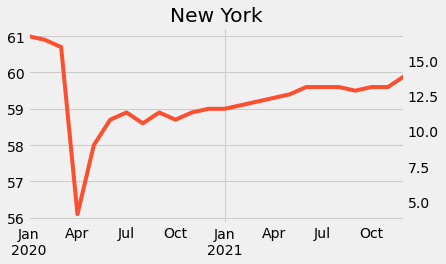

In [196]:
# unemployment data for 2020 to 2022 of New York
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemploy_df.query('index >= 2020 and index < 2022')['New York']\
    .plot(ax=ax2, label='Unemployment')
part_states.query('index >= 2020 and index < 2022')['New York']\
    .plot(ax=ax, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('New York')

In [207]:
# fix column names
unemploy_df.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah',
       'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota',
       'Montana', 'the District of Columbia', 'Mississippi', 'Maine',
       'Nebraska', 'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island',
       'Kansas', 'Wyoming', 'Delaware', 'Vermont', 'South Dakota',
       'Midwest Census Region', 'South Census Region',
       'Northeast Census Region', 'West Census Region',
       'New England Census Division'],
      dtype='object')

In [205]:
part_states.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District Of Columbia', 'Delaware', 'Wyoming'],
      dtype='object')

In [203]:
set(unemploy_df.columns.to_list()).symmetric_difference(set(part_states.columns.tolist()))

{'District Of Columbia',
 'Midwest Census Region',
 'New England Census Division',
 'Northeast Census Region',
 'Puerto Rico',
 'South Census Region',
 'West Census Region',
 'the District of Columbia'}

In [209]:
unemploy_df = unemploy_df.drop(['Midwest Census Region',
 'New England Census Division',
 'Northeast Census Region',
 'Puerto Rico',
 'South Census Region',
 'West Census Region'],axis=1)

In [214]:
unemploy_df = unemploy_df.rename(columns={'District of Columbia':'District Of Columbia'})

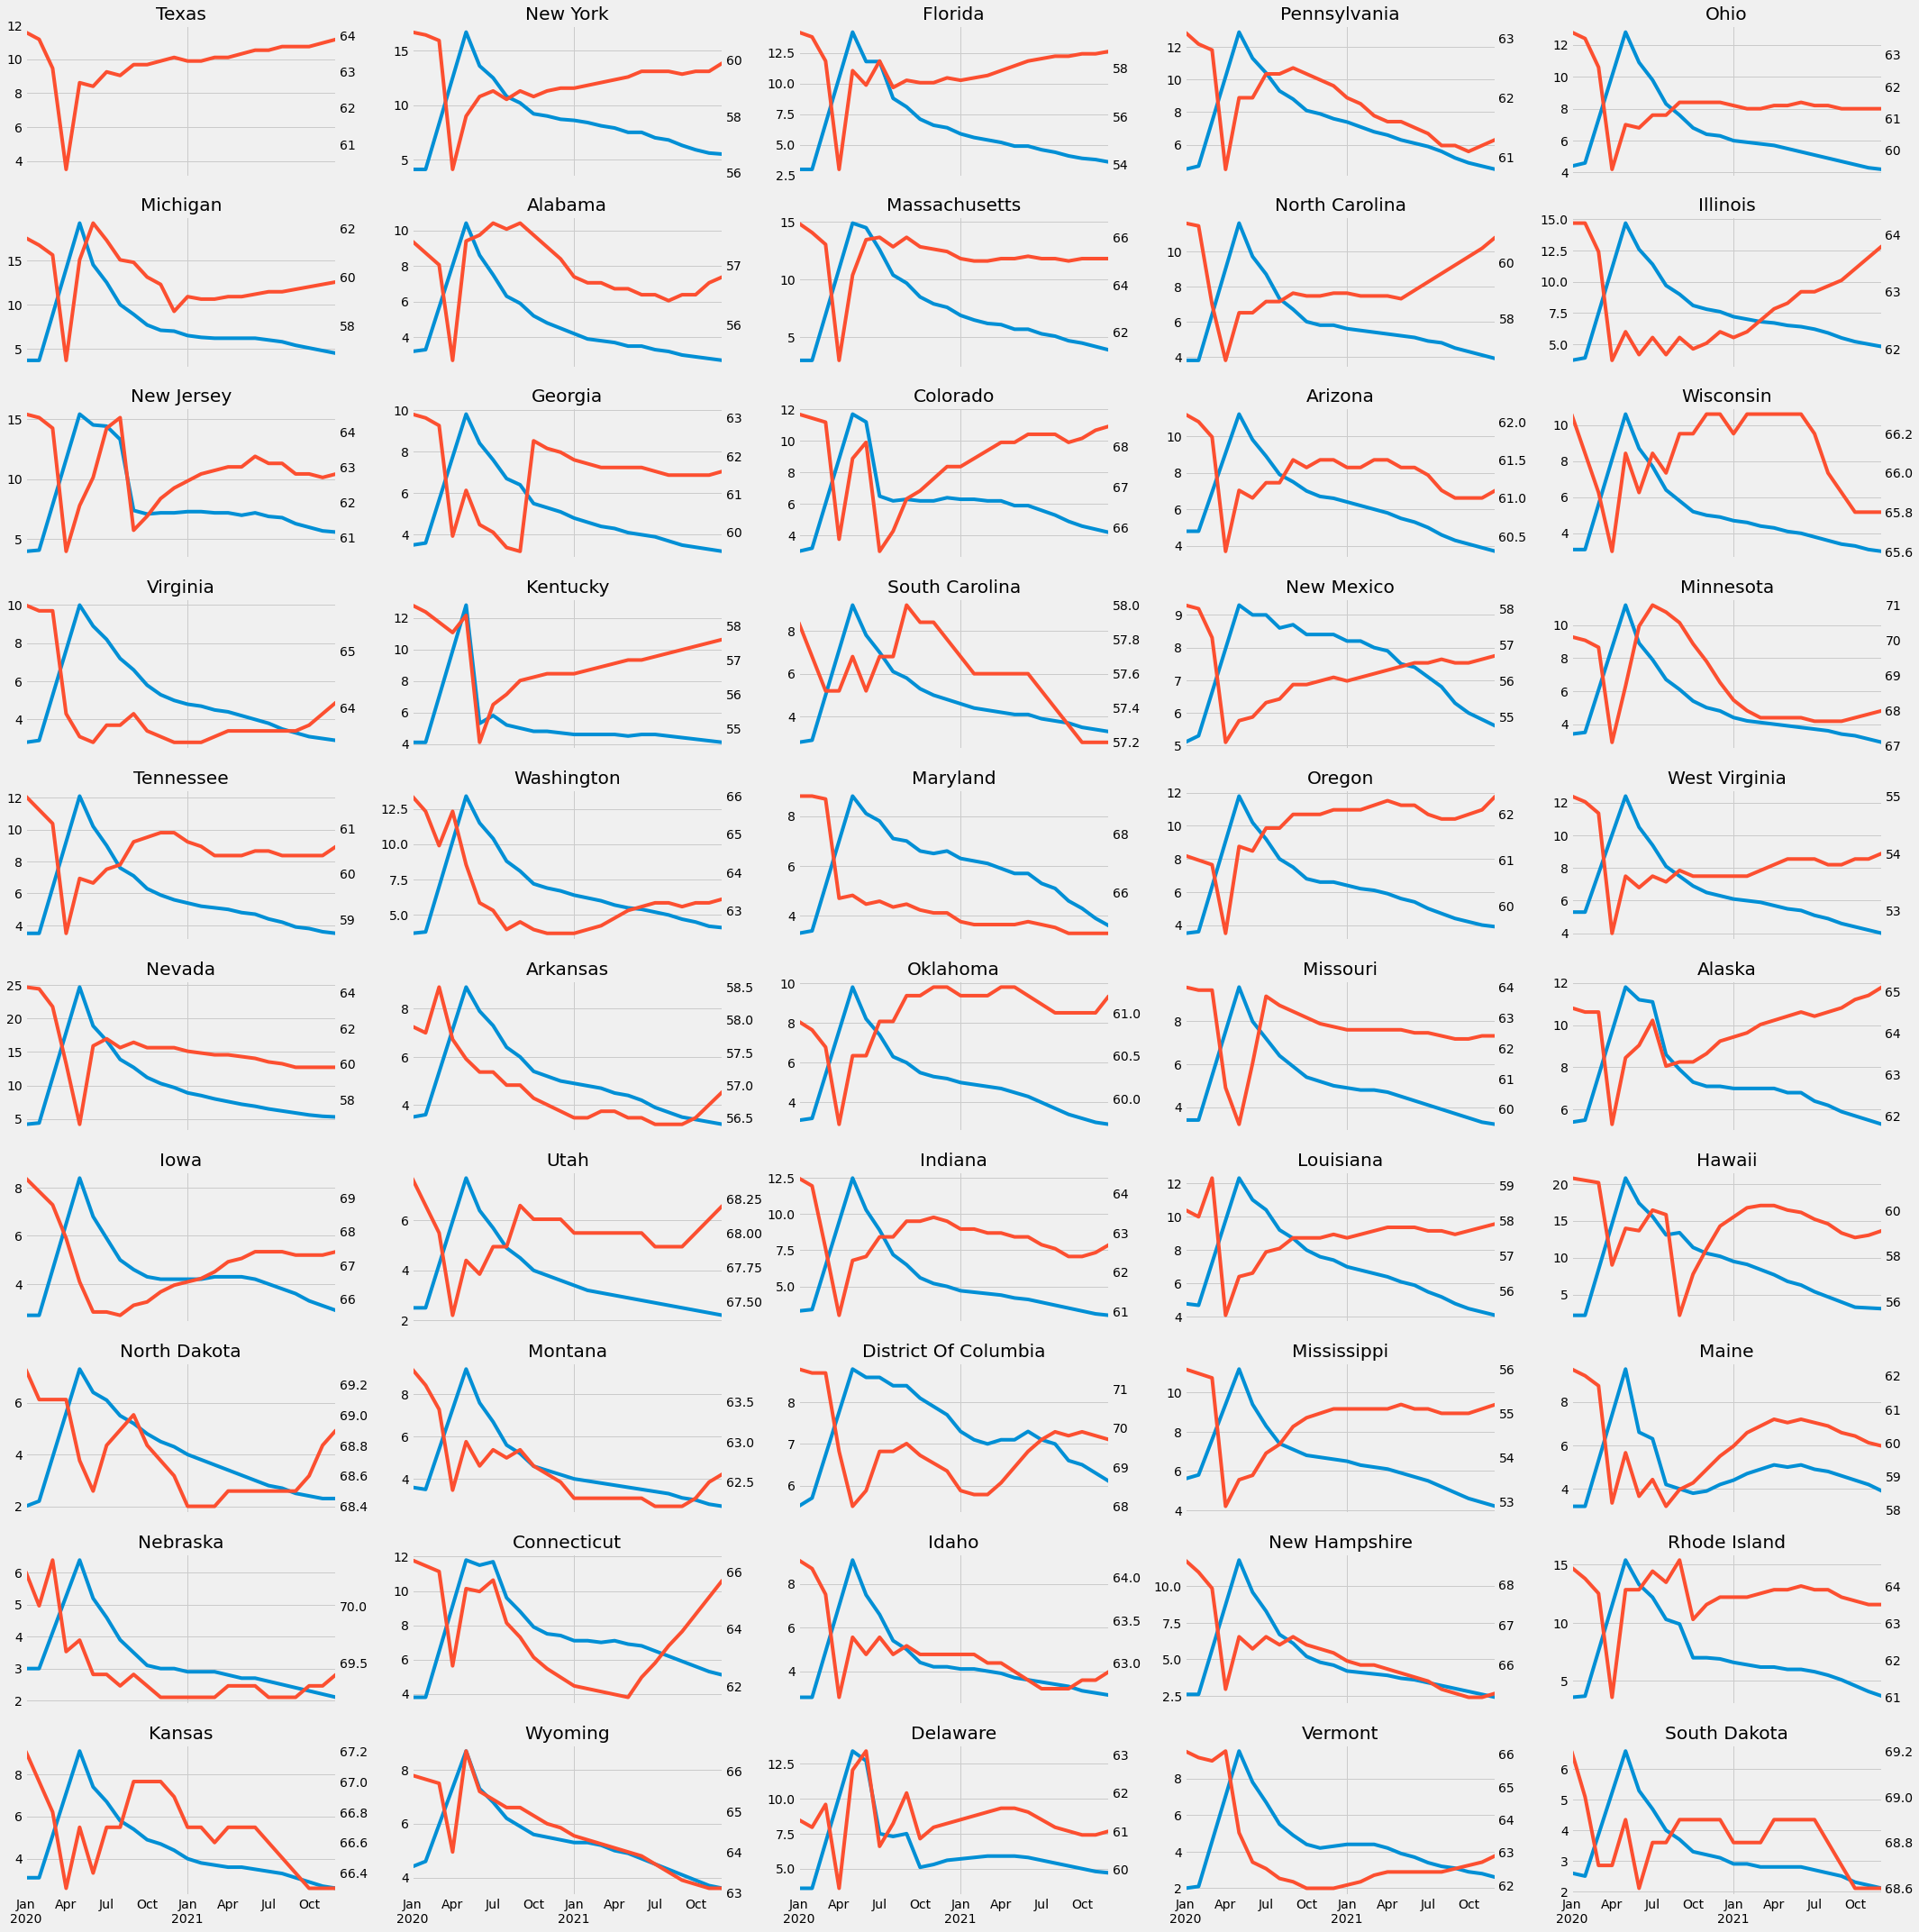

In [225]:
fig, axs = plt.subplots(10,5,figsize=(30,30),sharex=True)
axs = axs.flatten()

i=0
for state in unemploy_df.columns:
    if state == 'California':
        continue
    ax2 = axs[i].twinx()
    unemploy_df.query('index >= 2020 and index < 2022')[state]\
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state]\
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    # ax.set_title('New York')
    i=i+1
plt.tight_layout()
plt.show()